## Upload Titanic Dataset

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving titanic.csv to titanic.csv
User uploaded file "titanic.csv" with length 60302 bytes


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load dataframe
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Minimun EDA

In [ ]:
# Dataset size
n_samples, n_features = df.shape
print(f"Cantidad de Observaciones: {n_samples}, Cantidad de caracteristicas: {n_features}")

Cantidad de Observaciones: 891, Cantidad de caracteristicas: 12


In [ ]:
# Stadistic analisys
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Se observar que las caracteristicas:


*   Age tiene 177 valores nulos
*   Cabin tiene 687 valores nulos
*   Embarked tiene 2 valores nulos



In [ ]:
# data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**analisis**

* Sex se puede pasar a booleano 1 para male y 0 para famale
* Otras variables categoricas como Name y Cabin se les debe evaluar la cardinalidad.
* Variable target "Survived" se tiene que evaluar si esta balanceada o no







In [ ]:
# taking numerical features to make a correlation study
df_corr = df.copy()
df_corr = df_corr.select_dtypes(include='number')

df_corr.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

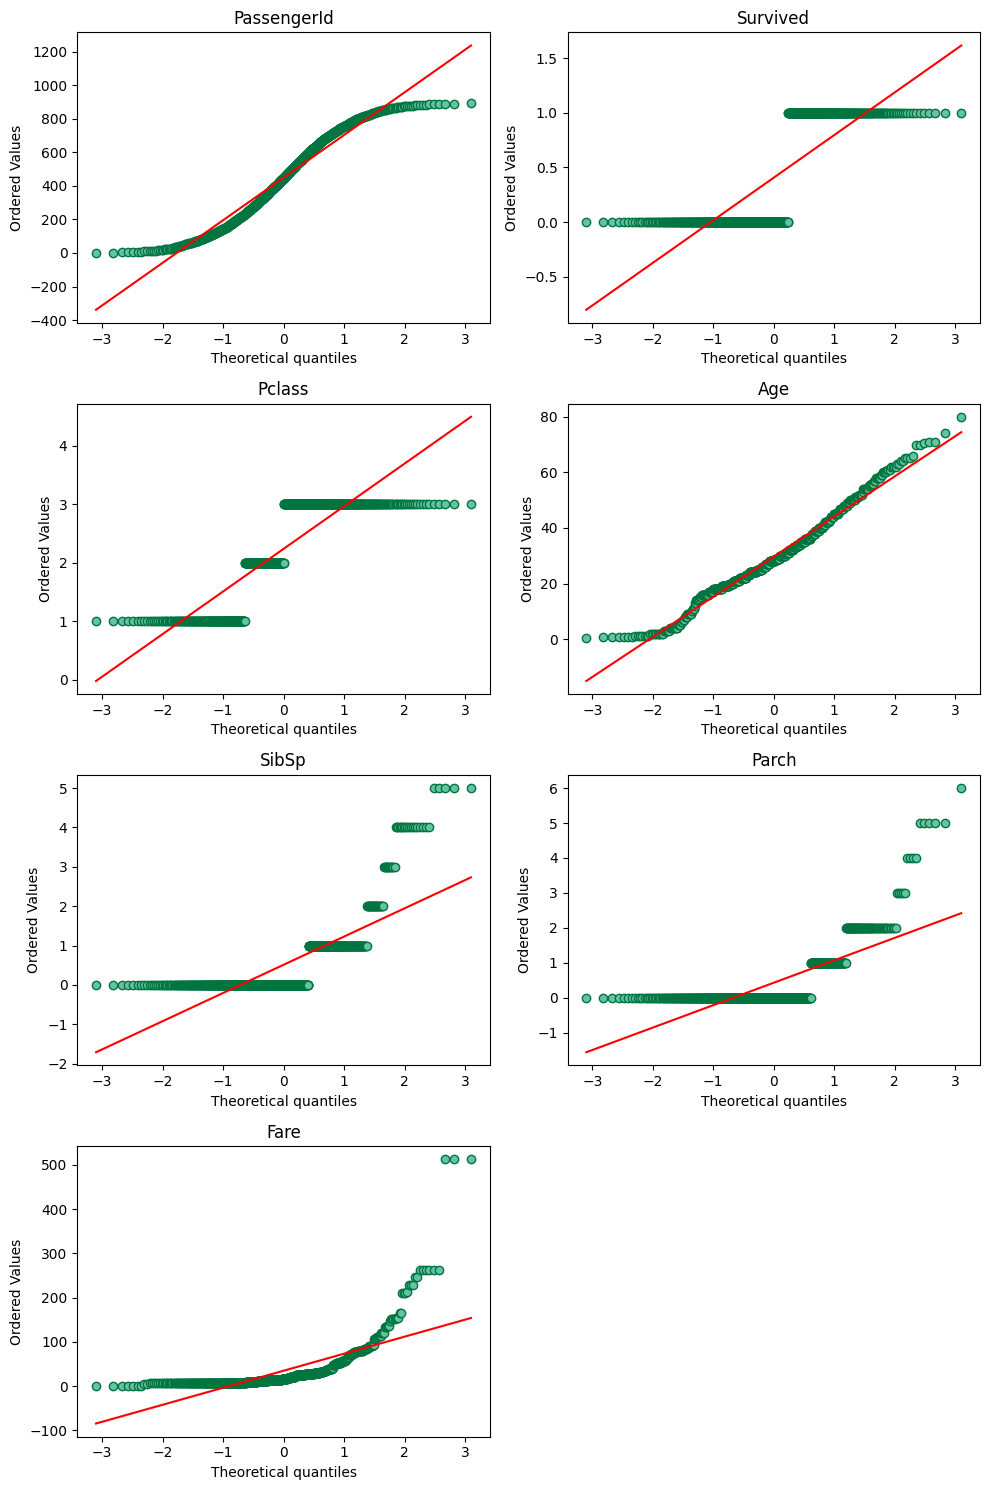

In [ ]:
# finding lineal patterns in the features
from scipy import stats
import matplotlib.pyplot as plt

df_corr.dropna(inplace=True)

num_features = len(df_corr.columns)
num_rows = (num_features + 1) // 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 15))

for k, xi in enumerate(df_corr.columns):
    row = k // num_cols
    col = k % num_cols
    stats.probplot(df_corr[xi], dist="norm", plot=axes[row, col])
    axes[row, col].set_title(xi)
    axes[row, col].get_lines()[0].set_markerfacecolor('#66c2a5')
    axes[row, col].get_lines()[0].set_markeredgecolor('#007540')


if num_features % 2 != 0:
    axes[num_rows - 1, num_cols - 1].axis("off")

plt.tight_layout()
plt.show()

**Analisis**

No se observa una linealidad sobre todas las features numericas, por lo tanto, no se puede hacer un estudio de correlacion con pearson y se tendra que realizar con spearman.

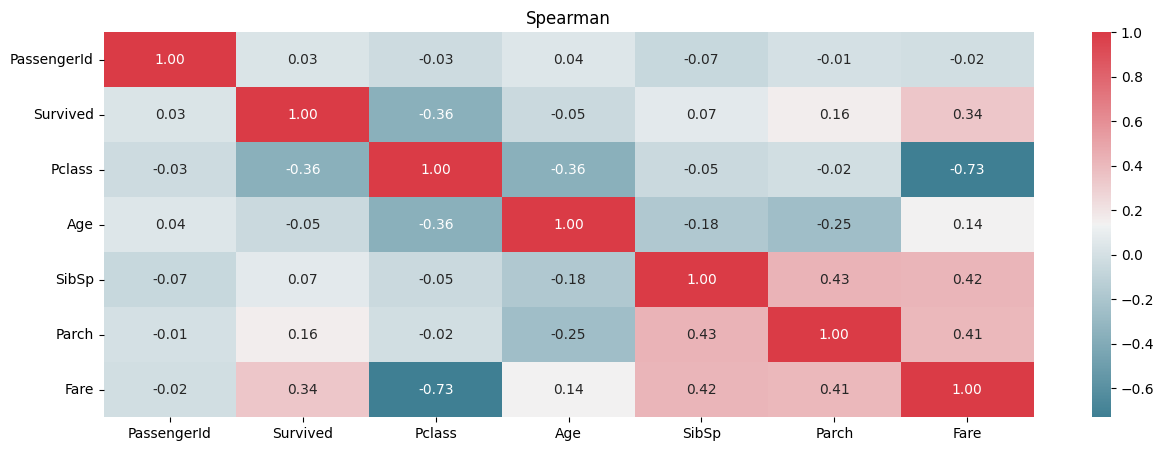

In [ ]:
# heatmap for correlation
corr = df_corr.corr(method='spearman')
fig = plt.figure(figsize=(15,5))
plt.title("Spearman")
sns.heatmap(corr, cmap=sns.diverging_palette(220,10,as_cmap=True),annot=True,fmt=".2f")
sns.set(font_scale=0.9)

Las caracteristicas que tienen una mayor correlacion positiva con la variable target son:
* Fare
* Parch

Por otro lado, "Age" y "Pclass" tiene una correlacion negativa con respecto a la variable target lo que quiere decir que esta inversamente relacionada.

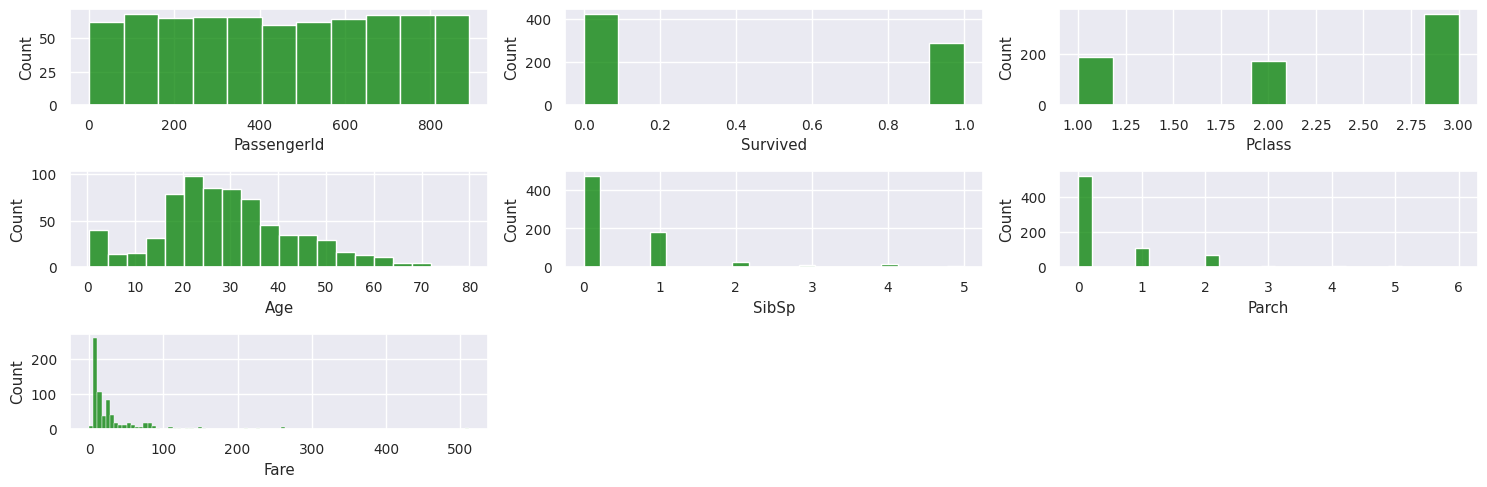

In [ ]:
# checking distributions
fig = plt.figure(figsize=(15,5))
for i in range(len(df_corr.columns)):
  fig.add_subplot(3, 3, i +1)
  sns.histplot(data=df_corr, x=df_corr.columns[i], color='green')
  plt.tight_layout()
plt.show()

**Analisis**

Como se puede notar las distribuciones no son normales como ya se habia probado anteriormente.

In [ ]:
# testing balance dataset on target feature
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

**Analsis**

El dataset esta ligeramente desbalanceado, teniendo mas casos de la clase 0 que de la .

## Feature Engineering

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#### Split dataset

In [ ]:
# split data
train_ratio = 0.70
test_ratio = 0.30

X = df.drop(columns='Survived')
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio)
print("Train: ", X_train.shape,y_train.shape)
print("Test:", X_test.shape,y_test.shape)

Train:  (623, 11) (623,)
Test: (268, 11) (268,)


#### Missing values

In [ ]:
# Missing values
X_train['Cabin'].head(10)

92     E31
497    NaN
140    NaN
864    NaN
319    E34
152    NaN
407    NaN
749    NaN
467    NaN
745    B22
Name: Cabin, dtype: object

In [ ]:
X_test['Cabin'].head(10)

327      D
172    NaN
15     NaN
875    NaN
419    NaN
868    NaN
409    NaN
339      T
144    NaN
354    NaN
Name: Cabin, dtype: object

**Analisis**

Los valores de los nombres de las cabinas puede tratarse de un MNAR (Missing Data not at Random) por lo que se piensa que esta data faltante tiene una explicación.

Por lo tanto se tratara con una Imputacion por valor arbitrario, ya que este metodo puede capturar la importancia de los datos faltantes, en caso de haberla.

In [ ]:
# replace NaN for -1 (Imputacion por valor arbitrario)
X_train['Cabin'].replace(to_replace=np.nan, value=-1, inplace=True)
X_test['Cabin'].replace(to_replace=np.nan, value=-1, inplace=True)

In [ ]:
X_train['Cabin'].isnull().sum()

0

In [ ]:
X_test['Cabin'].isnull().sum()

0

In [ ]:
# Age
X_train['Age'].head(10)

92     46.0
497     NaN
140     NaN
864    24.0
319    40.0
152    55.5
407     3.0
749    31.0
467    56.0
745    70.0
Name: Age, dtype: float64

In [ ]:
X_train['Age'].isnull().sum()

121

In [ ]:
X_test['Age'].isnull().sum()

56

**Analisis**

para este caso como son edades y tiene muchos datos faltantes sacar la media podría agregar distorsion. Sin embargo por simplicidad se continuara con el promedio.

In [ ]:
# apply mean imputation
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train[['Age']] = imputer.fit_transform(X_train[['Age']])
X_test[['Age']] = imputer.transform(X_test[['Age']])

In [ ]:
X_train['Age'].isnull().sum()

0

In [ ]:
X_test['Age'].isnull().sum()

0

**Analisis**

Imputacion para Embarked. Al ser una varible categorica se podría imputar por el valor mas frecuente. Por lo que se ve es una variables con cardinalidad baja

In [ ]:
X_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
X_train['Embarked'].value_counts()

S    451
C    114
Q     56
Name: Embarked, dtype: int64

In [ ]:
X_train['Embarked'].isnull().sum()

2

In [ ]:
X_test['Embarked'].isnull().sum()

0

In [ ]:
imputer_02 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_train[['Embarked']] = imputer_02.fit_transform(X_train[['Embarked']])
X_test[['Embarked']] = imputer_02.transform(X_test[['Embarked']])

In [ ]:
X_train['Embarked'].isnull().sum()

0

In [ ]:
X_test['Embarked'].isnull().sum()

0

#### Encoding

In [ ]:
# encoding sex male: 1 and famale: 0
dict_sex = {
    'male':'1',
    'female':'0'
}
X_train[['Sex']] = X_train[['Sex']].replace(dict_sex).astype(float)
X_test[['Sex']] = X_test[['Sex']].replace(dict_sex).astype(float)
X_train['Sex'].head()

92     1.0
497    1.0
140    0.0
864    1.0
319    0.0
Name: Sex, dtype: float64

In [ ]:
# list variables with high cardinality
X_train['Name'].unique()

array(['Chaffee, Mr. Herbert Fuller', 'Shellard, Mr. Frederick William',
       'Boulos, Mrs. Joseph (Sultana)', 'Gill, Mr. John William',
       'Spedden, Mrs. Frederic Oakley (Margaretta Corning Stone)',
       'Meo, Mr. Alfonzo', 'Richards, Master. William Rowe',
       'Connaghton, Mr. Michael', 'Smart, Mr. John Montgomery',
       'Crosby, Capt. Edward Gifford', 'Barah, Mr. Hanna Assi',
       'Abbing, Mr. Anthony', 'Jansson, Mr. Carl Olof',
       'Smith, Mr. Thomas', 'Givard, Mr. Hans Kristensen',
       'Laroche, Mrs. Joseph (Juliette Marie Louise Lafargue)',
       'Beckwith, Mrs. Richard Leonard (Sallie Monypeny)',
       'Garside, Miss. Ethel', 'Duane, Mr. Frank',
       'Astor, Mrs. John Jacob (Madeleine Talmadge Force)',
       'Rice, Master. Eugene', 'Nenkoff, Mr. Christo',
       'Lemore, Mrs. (Amelia Milley)', 'Sawyer, Mr. Frederick Charles',
       'Davies, Mr. Alfred J',
       'Phillips, Miss. Kate Florence ("Mrs Kate Louise Phillips Marshall")',
       'Hoyt, Mr. Fr

In [ ]:
X_train['Cabin'].unique()

array(['E31', -1, 'E34', 'B22', 'D35', 'C62 C64', 'F33', 'C93', 'F G73',
       'E33', 'B78', 'A10', 'E17', 'B96 B98', 'B35', 'D15', 'D', 'D20',
       'B57 B59 B63 B66', 'A19', 'B28', 'C22 C26', 'C23 C25 C27', 'C52',
       'C78', 'C148', 'C2', 'C49', 'F E69', 'D56', 'E67', 'E58', 'B30',
       'C45', 'A34', 'E46', 'E50', 'A7', 'E63', 'C92', 'B102', 'E77',
       'B69', 'A23', 'E121', 'G6', 'F2', 'E101', 'D47', 'B37', 'C90',
       'D28', 'A26', 'D37', 'C7', 'B19', 'D49', 'C110', 'C128', 'B79',
       'E40', 'D45', 'A20', 'C126', 'F4', 'B38', 'C70', 'C91', 'B58 B60',
       'B94', 'B4', 'C83', 'B51 B53 B55', 'C123', 'A32', 'C87', 'E49',
       'C82', 'C65', 'C125', 'D30', 'C32', 'E24', 'B5', 'C46', 'C106',
       'E8', 'D46', 'E38', 'B39', 'C30', 'C124', 'D10 D12', 'D33', 'E44',
       'D11', 'B49', 'D9', 'C111', 'B20', 'C85', 'C68', 'D17', 'D6',
       'A36', 'D26', 'F38', 'E36', 'B86', 'C101', 'D36', 'F G63', 'E10',
       'A5', 'B41', 'E68'], dtype=object)

**Analisis**

Intentaremos usar Name y Cabin para embeding con Neural Networks.

In [ ]:
# Encoding for ticket
X_train['Ticket'].unique()

array(['W.E.P. 5734', 'C.A. 6212', '2678', '233866', '16966',
       'A.5. 11206', '29106', '335097', '113792', 'WE/P 5735', '2663',
       'C.A. 5547', '350034', '384461', '250646', 'SC/Paris 2123',
       '11751', '243880', '336439', 'PC 17757', '382652', '349234',
       'C.A. 34260', '342826', 'A/4 48871', '250655', '19943', 'PC 17604',
       '349207', '2629', '370371', '345764', '28228', '113789',
       'A.5. 18509', 'A/5 3536', '111428', 'W./C. 14258', '363291',
       '348124', 'C 7076', 'S.C./PARIS 2079', '350036', 'SC/PARIS 2133',
       '347082', 'A/5 2466', '112052', 'C.A. 33595', '113505', '3101278',
       '315094', '28664', '345773', '349221', '345763', '19972', '233639',
       'PC 17569', '8475', '370372', 'C 17369', '1601', '349214',
       '347061', '347077', '349245', '239854', '12233', '2003',
       'CA. 2343', 'C 4001', '347088', '13049', 'SOTON/OQ 392089',
       '250651', 'C.A. 31921', 'F.C.C. 13528', '65304', '113055',
       '370129', 'SOTON/OQ 392086', '237

In [ ]:
X_train.drop(columns=['Ticket'], inplace=True)
X_test.drop(columns=['Ticket'], inplace=True)

In [ ]:
X_train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

**Analisis**

Eliminamos Ticket ya que tiene una alta cardinalidad y no se considera una variable informativa.

In [ ]:
# Embarked
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_enc = enc.fit_transform(X_train[['Embarked']])
X_test_enc = enc.transform(X_test[['Embarked']])

In [ ]:
enc.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [ ]:
X_train_ohe = pd.DataFrame(X_train_enc, columns= enc.categories_)
X_test_ohe = pd.DataFrame(X_test_enc, columns= enc.categories_)

In [ ]:
X_train_ohe.head()

,C,Q,S
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [ ]:
# Drop Embarke. then we will added encoded
X_train.drop(columns=['Embarked'], inplace=True)
X_test.drop(columns=['Embarked'], inplace=True)

**Analisis**

Embarked al ser una varible categorica con poca cardinalidad le aplicamos one hot encoder.

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 92 to 160
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  623 non-null    int64  
 1   Pclass       623 non-null    int64  
 2   Name         623 non-null    object 
 3   Sex          623 non-null    float64
 4   Age          623 non-null    float64
 5   SibSp        623 non-null    int64  
 6   Parch        623 non-null    int64  
 7   Fare         623 non-null    float64
 8   Cabin        623 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 48.7+ KB


In [ ]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin
92,93,1,"Chaffee, Mr. Herbert Fuller",1.0,46.000000,1,0,61.1750,E31
497,498,3,"Shellard, Mr. Frederick William",1.0,29.715817,0,0,15.1000,-1
140,141,3,"Boulos, Mrs. Joseph (Sultana)",0.0,29.715817,0,2,15.2458,-1
864,865,2,"Gill, Mr. John William",1.0,24.000000,0,0,13.0000,-1
319,320,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",0.0,40.000000,1,1,134.5000,E34


#### Normalizing

In [ ]:
X_train.var(ddof=0)

<ipython-input-37-308801690129>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train.var(ddof=0)


PassengerId    66791.418281
Pclass             0.695418
Sex                0.228429
Age              172.975071
SibSp              1.297950
Parch              0.629389
Fare            1773.442247
dtype: float64

In [ ]:
X_test.var(ddof=0)

<ipython-input-38-a21e2da3a2c7>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_test.var(ddof=0)


PassengerId    64681.100913
Pclass             0.703052
Sex                0.227723
Age              159.301625
SibSp              1.018155
Parch              0.694308
Fare            4075.033343
dtype: float64

In [ ]:
num_x_train = X_train.select_dtypes(include='number')
num_x_test = X_test.select_dtypes(include='number')

In [ ]:
num_x_train.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
# scale using StandardScaler
data_scaled = StandardScaler()
X_train_scale = data_scaled.fit_transform(num_x_train)
X_test_scale = data_scaled.transform(num_x_test)

# converting back to dataframe
X_train_scaled = pd.DataFrame(X_train_scale, columns=num_x_train.columns)
X_test_scaled = pd.DataFrame(X_test_scale, columns=num_x_test.columns)

In [ ]:
# taking categorical values
X_train_categorical = X_train.select_dtypes(include='object')
X_test_categorical = X_test.select_dtypes(include='object')

In [ ]:
# reset index to avoid issues
X_train_scaled.reset_index(drop=True, inplace=True)
X_train_categorical.reset_index(drop=True, inplace=True)
X_test_scaled.reset_index(drop=True, inplace=True)
X_test_categorical.reset_index(drop=True, inplace=True)
X_train_ohe.reset_index(drop=True, inplace=True)
X_test_ohe.reset_index(drop=True, inplace=True)

# concatenate numbers and objects
X_train = pd.concat([X_train_scaled, X_train_categorical, X_train_ohe], axis=1)
X_test = pd.concat([X_test_scaled, X_test_categorical, X_test_ohe], axis=1)

In [ ]:
X_train.var(ddof=0)

<ipython-input-44-308801690129>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train.var(ddof=0)


PassengerId    1.000000
Pclass         1.000000
Sex            1.000000
Age            1.000000
SibSp          1.000000
Parch          1.000000
Fare           1.000000
(C,)           0.149502
(Q,)           0.081808
(S,)           0.198413
dtype: float64

In [ ]:
X_test.var(ddof=0)

<ipython-input-45-a21e2da3a2c7>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_test.var(ddof=0)


PassengerId    0.968404
Pclass         1.010977
Sex            0.996910
Age            0.920951
SibSp          0.784434
Parch          1.103147
Fare           2.297810
(C,)           0.160893
(Q,)           0.072218
(S,)           0.201534
dtype: float64

In [ ]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Name,Cabin,"(C,)","(Q,)","(S,)"
0,-1.365985,-1.551401,0.738854,1.238153,0.401539,-0.473444,0.703022,"Chaffee, Mr. Herbert Fuller",E31,0.0,0.0,1.0
1,0.201108,0.846918,0.738854,0.000000,-0.476211,-0.473444,-0.391077,"Shellard, Mr. Frederick William",-1,0.0,0.0,1.0
2,-1.180256,0.846918,-1.353447,0.000000,-0.476211,2.047543,-0.387615,"Boulos, Mrs. Joseph (Sultana)",-1,1.0,0.0,0.0
3,1.621164,-0.352241,0.738854,-0.434597,-0.476211,-0.473444,-0.440944,"Gill, Mr. John William",-1,0.0,0.0,1.0
4,-0.487639,-1.551401,-1.353447,0.781948,0.401539,0.787050,2.444202,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",E34,1.0,0.0,0.0


In [ ]:
X_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Name,Cabin,"(C,)","(Q,)","(S,)"
0,-0.456684,-0.352241,-1.353447,0.477812,-0.476211,-0.473444,-0.440944,"Ball, Mrs. (Ada E Hall)",D,0.0,0.0,1.0
1,-1.056436,0.846918,-1.353447,-2.183380,0.401539,0.787050,-0.485271,"Johnson, Miss. Eleanor Ileen",-1,0.0,0.0,1.0
2,-1.663926,-0.352241,-1.353447,1.922459,-0.476211,-0.473444,-0.369706,"Hewlett, Mrs. (Mary D Kingcome)",-1,0.0,0.0,1.0
3,1.663727,0.846918,-1.353447,-1.118903,-0.476211,-0.473444,-0.578077,"Najib, Miss. Adele Kiamie ""Jane""",-1,1.0,0.0,0.0
4,-0.100703,0.846918,-1.353447,-1.499074,-0.476211,2.047543,-0.176175,"Van Impe, Miss. Catharina",-1,0.0,0.0,1.0


## Model with Embedings

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn import metrics

**Analisis**

los embedings nos ayudan a utilizar las variables categoricas con alta cardinalidad en el entrenamiento de la red neuronal. Con esto, si consideramos que una variable de este tipo puede ayudarnos a resolver un problema, los embedings solucionan los problemas que nos traeria hacerlo con OneHotEncoding por ejemplo.

Por otro lado, la red neuronal será capaz de ajustar los valores de cada vector dentro del embeding con cada iteración, manteniendo y mejorando así la relación que podrían tener estas categorías con el resto de las variables.

In [ ]:
# Embedding
cabin_train = X_train['Cabin']
cabin_test = X_test['Cabin']

Name_train =  X_train['Name']
Name_test =  X_test['Name']

**Nota**

Por ahora se hará con un solo embedding utilizando la info de Cabin, pero luego tambien se probara con Name

In [ ]:
# copying both datasets
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
# drop Name column
X_train_copy.drop(columns=['Name'], inplace=True)
X_test_copy.drop(columns=['Name'], inplace=True)

# drop Cabin column
X_train_copy.drop(columns=['Cabin'], inplace=True)
X_test_copy.drop(columns=['Cabin'], inplace=True)

In [ ]:
X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  623 non-null    float64
 1   Pclass       623 non-null    float64
 2   Sex          623 non-null    float64
 3   Age          623 non-null    float64
 4   SibSp        623 non-null    float64
 5   Parch        623 non-null    float64
 6   Fare         623 non-null    float64
 7   (C,)         623 non-null    float64
 8   (Q,)         623 non-null    float64
 9   (S,)         623 non-null    float64
dtypes: float64(10)
memory usage: 48.8 KB


In [ ]:
# number of categorical values
len(cabin_train.unique())

116

In [ ]:
len(cabin_test.unique())

55

In [ ]:
# total for embedding dimension
total = len(cabin_train.unique()) + len(cabin_test.unique())
total

171

In [ ]:
cabin_train.unique()

array(['E31', -1, 'E34', 'B22', 'D35', 'C62 C64', 'F33', 'C93', 'F G73',
       'E33', 'B78', 'A10', 'E17', 'B96 B98', 'B35', 'D15', 'D', 'D20',
       'B57 B59 B63 B66', 'A19', 'B28', 'C22 C26', 'C23 C25 C27', 'C52',
       'C78', 'C148', 'C2', 'C49', 'F E69', 'D56', 'E67', 'E58', 'B30',
       'C45', 'A34', 'E46', 'E50', 'A7', 'E63', 'C92', 'B102', 'E77',
       'B69', 'A23', 'E121', 'G6', 'F2', 'E101', 'D47', 'B37', 'C90',
       'D28', 'A26', 'D37', 'C7', 'B19', 'D49', 'C110', 'C128', 'B79',
       'E40', 'D45', 'A20', 'C126', 'F4', 'B38', 'C70', 'C91', 'B58 B60',
       'B94', 'B4', 'C83', 'B51 B53 B55', 'C123', 'A32', 'C87', 'E49',
       'C82', 'C65', 'C125', 'D30', 'C32', 'E24', 'B5', 'C46', 'C106',
       'E8', 'D46', 'E38', 'B39', 'C30', 'C124', 'D10 D12', 'D33', 'E44',
       'D11', 'B49', 'D9', 'C111', 'B20', 'C85', 'C68', 'D17', 'D6',
       'A36', 'D26', 'F38', 'E36', 'B86', 'C101', 'D36', 'F G63', 'E10',
       'A5', 'B41', 'E68'], dtype=object)

In [ ]:
# map cabins with index
cabin_idx_train = {value:key for key,value in enumerate(cabin_train.unique())}
cabin_idx_test = {value:key for key,value in enumerate(cabin_test.unique())}

In [ ]:
cabin_idx_train['C83'] # value = key. Give cabin number and return the index

71

In [ ]:
# Vector of cabin_idx en el dataset
vector_idx_trian = np.array([cabin_idx_train[value] for value in cabin_train])
vector_idx_test = np.array([cabin_idx_test[value] for value in cabin_test])

In [ ]:
print(vector_idx_trian)

[  0   1   1   1   2   1   1   1   1   3   1   1   1   1   1   1   4   1
   1   5   1   1   6   1   1   1   7   1   1   1   1   1   1   1   1   1
   1   1   1   8   1   1   1   1   1   1   1   1   9   1   1   1   1   1
   1   1   1  10   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1  11   1   1   1   1   1   1   1  12   1   1   1   1  13   1  14
   1  15   1   1   1   1  16  17   1   1   1   1   1   1   1   1   1  18
   1   1   1  19   1   1   1   1   1  20   1   1  21   1   1   1   1   1
   1   1  22  23  24   1  14   1   1   1   1   1   1   1  25  26  27   1
   1   1   1   1  13  17   1   1   1  26  28   1   1   1   1   1  29   1
   1   1   6   1   1   1   1  30   1  31  32   1  33   1   1  34   3   1
   1  35   1  13   1   1   1   1  22   1   1  36   9   1  37  38   1   1
   1   1   1   1  39  40  41   1   1   1   1   1   1   1   1   1   1   1
  42   1  43  44   1   1   1   1  45   1   1   1  46  23   1  47  48   1
   1   1   1   1   1   1   1   1   1   1   1   1   

In [ ]:
# creating dataset class for pytorch
class Mydataset(Dataset):

  #__init__ save dataset
  def __init__(self, x, embeding, y):
    self.x = x.to_numpy()
    self.y = y.to_numpy()
    self.embeding = embeding
  # __len__ define len() behaivior
  def __len__(self) -> int:
    return self.x.shape[0]
  # __getitem__ define behaivior of []
  def __getitem__(self, idx):
     return self.x[idx], self.embeding[idx], self.y[idx]

In [ ]:
# new datasets for NN
X_train_one_embeding = Mydataset(X_train_copy, vector_idx_trian, y_train)
X_test_one_embeding = Mydataset(X_test_copy, vector_idx_test, y_test)

In [ ]:
# test class
len(X_train_one_embeding)

623

In [ ]:
len(X_test_one_embeding)

268

In [ ]:
X_train_one_embeding[575]

(array([ 0.56869724,  0.84691842,  0.73885432,  1.31418681, -0.47621129,
        -0.4734437 , -0.57748381,  0.        ,  0.        ,  1.        ]),
 1,
 0)

In [ ]:
# Create dataloader
train_dataloader_one_em = DataLoader(X_train_one_embeding, batch_size=64, shuffle=True)
test_dataloader_one_em = DataLoader(X_test_one_embeding, batch_size=64)

In [ ]:
# NN architecture with one embeding
class NNet(torch.nn.Module):

  def __init__(self):
    # Defining NN architecture
    super().__init__()
    self.embeddings = torch.nn.Embedding(num_embeddings=169, embedding_dim=8)
    self.linear_1 = torch.nn.Linear(in_features=10+8, out_features=200, bias=True)
    self.relu_1 = torch.nn.ReLU()
    self.linear_2 = torch.nn.Linear(in_features=200, out_features=100, bias=True)
    self.relu_2 = torch.nn.ReLU()
    self.output = torch.nn.Linear(in_features=100, out_features=1, bias=True)

  def forward(self, x, cabin_idx):
    embedding_out = self.embeddings(cabin_idx) # taking each raw values for our embeding
    x = torch.cat([x, embedding_out], dim=1) # concatenate x_train and 8 embeding columns. dim it's like axis=1 from numpy
    x = self.linear_1(x)
    x = self.relu_1(x)
    x = self.linear_2(x)
    x = self.relu_2(x)
    x = self.output(x)
    return x


In [ ]:
# Network instance
nnnet_one_embedding = NNet()

In [ ]:
# loss function and optimization
loss_f = torch.nn.BCEWithLogitsLoss(reduction='sum')
optimizer = torch.optim.Adam(nnnet_one_embedding.parameters(), lr=0.01)

In [ ]:
device = "cpu"
if torch.cuda.is_available():
  device = "cuda:0"

device

'cpu'

In [ ]:
# copy NN to device
nn = nnnet_one_embedding.to(device)

In [ ]:
# Mini-batch
epochs = 100

train_loss_by_epoch=[]
test_loss_by_epoch=[]

for epoch in range(epochs):

  # starting training
  nn.train(True)
  # loss per epoch
  loss_epoch = 0
  # y and prediction
  y_epoch = []
  y_pred_epoch = []

  for i,data in enumerate(train_dataloader_one_em):
    # Data from train batch
    x_batch, embedding_batch, y_batch = data
    # copy batch to device where nn was instanciated
    x_batch = x_batch.to(device).float()
    embedding_batch = embedding_batch.to(device).int()
    y_batch = y_batch.to(device).float().reshape(-1,1)

    # cleaning optimizer
    optimizer.zero_grad()
    # forward
    nn_forward_out = nn(x_batch, embedding_batch)
    y_batch_pred = torch.sigmoid(nn_forward_out)

    # loss calculation -> loss(input, target)
    loss = loss_f(nn_forward_out, y_batch)

    # backward
    loss.backward()

    # update parameters
    optimizer.step()

    # save true values and predicted
    y_epoch += list(y_batch.detach().cpu().numpy())
    y_pred_epoch += list(y_batch_pred.detach().cpu().numpy())

    # save current loss
    loss_epoch = loss_epoch + loss.item()

  # mean loss
  loss_epoch = loss_epoch / X_train_copy.shape[0]
  # save loss to plot later
  train_loss_by_epoch.append(loss_epoch)
  # epoch metric
  accuracy = metrics.accuracy_score(y_epoch, [j>=0.5 for j in y_pred_epoch])


  ############
  # test dataset

  nn.train(False) # desactivate gradient calculation
  # loss per epoch
  loss_epoch_test = 0
  # y and prediction
  y_epoch_test = []
  y_pred_epoch_test = []

  for i,data in enumerate(test_dataloader_one_em):
    # Data from train batch
    x_batch, embedding_batch, y_batch = data
    # copy batch to device where nn was instanciated
    x_batch = x_batch.to(device).float()
    embedding_batch = embedding_batch.to(device).int()
    y_batch = y_batch.to(device).float().reshape(-1,1)

    # cleaning optimizer
    optimizer.zero_grad()
    # forward
    nn_forward_out = nn(x_batch, embedding_batch)
    y_batch_pred = torch.sigmoid(nn_forward_out)

    # loss calculation -> loss(input, target)
    loss = loss_f(nn_forward_out, y_batch)

    # No backward added on test batch

    # save true values and predicted
    y_epoch_test += list(y_batch.detach().cpu().numpy())
    y_pred_epoch_test += list(y_batch_pred.detach().cpu().numpy())

    # save current loss
    loss_epoch_test = loss_epoch_test + loss.item()

  # mean loss
  loss_epoch_test = loss_epoch_test / X_test_copy.shape[0]
  # save loss to plot later
  test_loss_by_epoch.append(loss_epoch_test)
  # epoch metric
  accuracy_test = metrics.accuracy_score(y_epoch_test, [ j >= 0.5 for j in y_pred_epoch_test])

  print(f" Epoch {epoch} | " \
        f"Train/Valid loss: {loss_epoch:.3f} / {loss_epoch_test:.3f} | " \
        f"Train/Valid accuracy: {accuracy:.3f} / {accuracy_test:.3f}")

 Epoch 0 | Train/Valid loss: 0.518 / 30.293 | Train/Valid accuracy: 0.738 / 0.646
 Epoch 1 | Train/Valid loss: 0.519 / 30.293 | Train/Valid accuracy: 0.738 / 0.646
 Epoch 2 | Train/Valid loss: 0.518 / 30.293 | Train/Valid accuracy: 0.738 / 0.646
 Epoch 3 | Train/Valid loss: 0.519 / 30.293 | Train/Valid accuracy: 0.738 / 0.646
 Epoch 4 | Train/Valid loss: 0.518 / 30.293 | Train/Valid accuracy: 0.738 / 0.646
 Epoch 5 | Train/Valid loss: 0.519 / 30.293 | Train/Valid accuracy: 0.738 / 0.646
 Epoch 6 | Train/Valid loss: 0.519 / 30.294 | Train/Valid accuracy: 0.738 / 0.646
 Epoch 7 | Train/Valid loss: 0.518 / 30.293 | Train/Valid accuracy: 0.738 / 0.646
 Epoch 8 | Train/Valid loss: 0.519 / 30.294 | Train/Valid accuracy: 0.738 / 0.646
 Epoch 9 | Train/Valid loss: 0.519 / 30.293 | Train/Valid accuracy: 0.738 / 0.646
 Epoch 10 | Train/Valid loss: 0.519 / 30.293 | Train/Valid accuracy: 0.738 / 0.646
 Epoch 11 | Train/Valid loss: 0.519 / 30.294 | Train/Valid accuracy: 0.738 / 0.646
 Epoch 12 | Tr